# B&D DS Exercise Part 2
## January 30th, 2018
### Dr Jose M Albornoz

# Import necessary modules

In [1]:
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
style.use('fivethirtyeight')
%matplotlib inline

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.cross_validation import cross_val_score
from sklearn.utils import resample
from sklearn.learning_curve import validation_curve
from sklearn.model_selection import train_test_split

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.classifier import StackingClassifier

import seaborn as sns
from datetime import datetime

RANDOM_STATE = 801

/Users/jmalbornoz/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jmalbornoz/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/jmalbornoz/anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

# 1 Load data

In [2]:
df_0 = pd.read_excel('kohls.xls')

In [3]:
df_0.head(5)

,SHIPPER,SHIPPER ADDRESS,CONSIGNEE,CONSIGNEE ADDRESS,ZIPCODE,NOTIFY,NOTIFY ADDRESS,BILL OF LADING,ARRIVAL DATE,WEIGHT (LB),...,DISTRIBUTION PORT,HOUSE vs MASTER,MASTER B/L,CARRIER CODE,CARRIER NAME,CARRIER ADDRESS,CARRIER CITY,CARRIER STATE,CARRIER ZIP,PLACE OF RECEIPT
0,CONTINENTAL CONAIR LIMITED,". 35 F.,STANDARD CHARTERED TOWER, MILLENNIUM C...",CONAIR CORPORATION,. 150 MILFORD ROAD EAST WINDSOR NJ 08520 U.S.A .,8520,CONAIR CORPORATION,. 150 MILFORD ROAD EAST WINDSOR NJ 08520 U.S.A .,HJSCHKG3B5123700,2013-10-07,18876.0,...,"Philadelphia, Pennsylvania",,,HJSC,HANJIN SHIPPING COMPANY LTD,80 EAST RT 4 SUITE 490,PARAMUS,NJ,7652,"YANTIAN,GUANGDONG"
1,DHL ISC (HONG KONG) LIMITED,"O/B:PUTIAN ANGOLAOD OUTDOOR GOODS CO., LTD LIY...",STONEWALL TRADING COMPANY LP,"844 MORAGA DRIVE LOS ANGELES,CA 90049 TEL:310-...",0,FED-EX TRADE NETWORK.TRANSPORT &STONEWALL TRAD...,BROKERAGE(TOWER GROUP)19601844 MORAGA DRIVE LO...,EGLV146300505161,2013-10-07,7772.6,...,,,,EGLV,EVERGREEN LINE,NO 163 SEC 1 HSIN-NAN ROAD LUCHU HSIAN,TAOYUAN HSIEN 338,,,"XIAMEN, CHINA"
2,HUGE WAY INTERNATIONAL CO LTD,SEC 2 HIS AN ST PEI TOU DIST,STONEWALL TRADING COMPANY,5900 RODEO RD LOS ANGELES 0,0,STONEWALL TRADING COMPANY,5900 RODEO RD LOS ANGELES,DMALNGB291543,2013-10-07,1894.2,...,,H,NYKS2335539080,DMAL,DANMAR LINES LTD,33 WASHINGTON ST - 14TH FL,NEWARK,NJ,7102,NINGBO
3,ZHEJIANG WUYU APPAREL CO.LTD,YUANJI ROAD NO.6 ECONOMIC DEVELOPMENT ZONE ZHE...,EXCELLED SHEEPSKIN AND LEATHER,COAT CORPORATION 1400 BROADWAY 31ST FLOOR NEW ...,10018,EXCELLED SHEEPSKIN AND LEATHER,COAT CORPORATION 1400 BROADWAY 31ST FLOOR NEW ...,EURFL13907135LAX,2013-10-07,2257.2,...,,H,NYKS2372251610,EURF,EURASIA EXPRESS,11222 LA CIENEGA BLVD - #220,INGLEWOOD,CA,90304,"SHANGHAI, CHINA"
4,DAMCO CHINA LIMITED SHANGHAI BRANCH,O B YANGZHOU TIANMAO SHOES MAKING CO LTD NO 36...,"WOLVERINE WORLD WIDE, INC.",9341 COURTLAND DRIVE ROCKFORD MI 49351 EIN 38-...,0,"WOLVERINE WORLD WIDE, INC.",9341 COURTLAND DRIVE ROCKFORD MI 49351 SHIPPIN...,KKLUSH5621783,2013-10-06,123272.6,...,,,,KKLU,KAWASAKI KISEN KAISHA LTD,,TOKYO,,,SHANGHAI


In [4]:
df_0.columns.tolist()

[u'SHIPPER',
 u'SHIPPER ADDRESS',
 u'CONSIGNEE',
 u'CONSIGNEE ADDRESS',
 u'ZIPCODE',
 u'NOTIFY',
 u'NOTIFY ADDRESS',
 u'BILL OF LADING',
 u'ARRIVAL DATE',
 u'WEIGHT (LB)',
 u'WEIGHT (KG)',
 u'FOREIGN PORT',
 u'US PORT',
 u'QUANTITY',
 u'Q.UNIT',
 u'MEASUREMENT',
 u'M.UNIT',
 u'SHIP REGISTERED IN',
 u'VESSEL NAME',
 u'CONTAINER NUMBER',
 u'CONTAINER COUNT',
 u'PRODUCT DETAILS',
 u'MARKS AND NUMBERS',
 u'COUNTRY OF ORIGIN',
 u'DISTRIBUTION PORT',
 u'HOUSE vs MASTER',
 u'MASTER B/L',
 u'CARRIER CODE',
 u'CARRIER NAME',
 u'CARRIER ADDRESS',
 u'CARRIER CITY',
 u'CARRIER STATE',
 u'CARRIER ZIP',
 u'PLACE OF RECEIPT']

In [5]:
df_0.shape

(2365, 34)

# 2 Filter Data

In [6]:
fields = ['ARRIVAL DATE', 'WEIGHT (KG)', 'FOREIGN PORT', 'US PORT', 'QUANTITY', 'Q.UNIT', 'MEASUREMENT',
          'SHIP REGISTERED IN', 'VESSEL NAME', 'CONTAINER NUMBER', 'CONTAINER COUNT', 'PRODUCT DETAILS',
          'COUNTRY OF ORIGIN', 'CARRIER NAME', 'PLACE OF RECEIPT']

In [7]:
df_1 = df_0.filter(items=fields)

In [8]:
df_1.columns.tolist()

['ARRIVAL DATE',
 'WEIGHT (KG)',
 'FOREIGN PORT',
 'US PORT',
 'QUANTITY',
 'Q.UNIT',
 'MEASUREMENT',
 'SHIP REGISTERED IN',
 'VESSEL NAME',
 'CONTAINER NUMBER',
 'CONTAINER COUNT',
 'PRODUCT DETAILS',
 'COUNTRY OF ORIGIN',
 'CARRIER NAME',
 'PLACE OF RECEIPT']

# 3 Preliminary data exploration

## 3.1 Arrival date


In [9]:
arrival_date_counts = df_1['ARRIVAL DATE'].value_counts(normalize=False, sort=True, ascending=False, 
                                                        bins=None, dropna=True)

In [10]:
# all values under tresh sum to one category
tresh = 10
a = arrival_date_counts[arrival_date_counts <= tresh].sum()
arrival_date_counts = arrival_date_counts[arrival_date_counts > tresh]

# then add to filtered series
arrival_date_counts.loc['other dates'] = a

In [11]:
arrival_date_counts_cumsum = np.cumsum(arrival_date_counts)

In [12]:
arrival_date_counts_cumsum_norm = arrival_date_counts_cumsum*100/max(arrival_date_counts_cumsum)

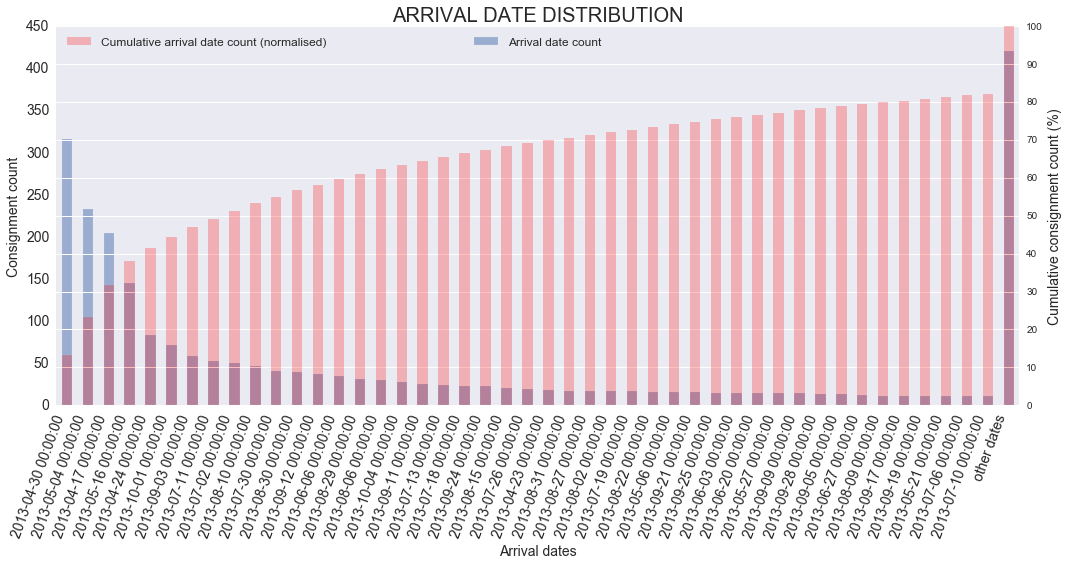

In [13]:
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()

bar1 = arrival_date_counts.plot(ax=ax1, kind='bar', label = 'Arrival date count', alpha = 0.5)
ax1.grid(False)
ax1.set_ylabel('Consignment count', fontsize=14)

plt.title('ARRIVAL DATE DISTRIBUTION', fontsize=20)
plt.xticks(rotation=70)
ax1.set_xlabel('Arrival dates', fontsize=14)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
major_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  
ax2.set_yticks(major_ticks)
ax2.set_ylabel('Cumulative consignment count (%)', fontsize=14)

bar2 = arrival_date_counts_cumsum_norm.plot(ax=ax2, kind='bar', color='red', alpha=0.25, 
                                            label = 'Cumulative arrival date count (normalised)')

ax1.legend(loc='upper center', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)

for tick in ax1.get_xticklabels():
    tick.set_rotation(70)
    
for tick in ax1.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")       

plt.tight_layout()

fig.savefig('fig2.png', facecolor=fig.get_facecolor(), edgecolor='none')

In [14]:
key_dates = arrival_date_counts[arrival_date_counts_cumsum_norm <= 0.75].index.tolist()

In [15]:
len(key_dates)

0

## 3.2 Foreign port


In [16]:
foreign_port_counts = df_1['FOREIGN PORT'].value_counts(normalize=False, sort=True, ascending=False, 
                                                        bins=None, dropna=True)

In [17]:
# all values under trash sum to one category
tresh = 40
a = foreign_port_counts[foreign_port_counts <= tresh].sum()
foreign_port_counts = foreign_port_counts[foreign_port_counts > tresh]

#then add to filtered df
foreign_port_counts.loc['other ports'] = a

In [18]:
foreign_port_counts_cumsum = np.cumsum(foreign_port_counts)

In [19]:
foreign_port_counts_cumsum_norm = foreign_port_counts_cumsum*100/max(foreign_port_counts_cumsum)

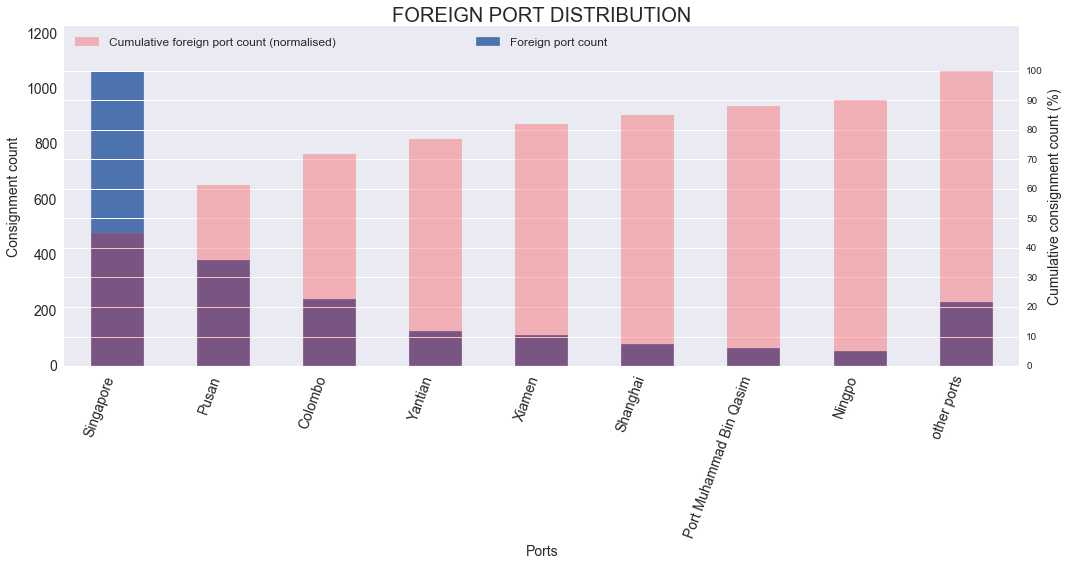

In [20]:
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()

bar1 = foreign_port_counts.plot(ax=ax1, kind='bar', label = 'Foreign port count')
ax1.grid(False)

plt.title('FOREIGN PORT DISTRIBUTION', fontsize=20)
plt.xticks(rotation=70)


for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
major_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  
ax2.set_yticks(major_ticks)
    
bar2 = foreign_port_counts_cumsum_norm.plot(ax=ax2, kind='bar', color='red', alpha=0.25, 
                                            label = 'Cumulative foreign port count (normalised)')

ax1.legend(loc='upper center', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)

for tick in ax1.get_xticklabels():
    tick.set_rotation(70)
    
for tick in ax1.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")       

ax1.set_ylabel('Consignment count', fontsize=14)
ax1.set_xlabel('Ports', fontsize=14)
ax2.set_ylabel('Cumulative consignment count (%)', fontsize=14)

ax1.set_ylim([0,1.15*1067])    
ax2.set_ylim([0,1.15*100])
    
plt.tight_layout()

fig.savefig('fig3.png', facecolor=fig.get_facecolor(), edgecolor='none')

In [21]:
key_foreign_ports = foreign_port_counts.index.tolist()[0:4]

In [22]:
len(key_foreign_ports)

4

In [23]:
key_foreign_ports

[u'Singapore', u'Pusan', u'Colombo', u'Yantian']

## 3.3 US port

In [24]:
us_port_counts = df_1['US PORT'].value_counts(normalize=False, sort=True, ascending=False, 
                                                        bins=None, dropna=True)

In [25]:
# all values under trash sum to one category
tresh = 20
a = us_port_counts[us_port_counts <= tresh].sum()
us_port_counts = us_port_counts[us_port_counts > tresh]

#then add to filtered df
us_port_counts.loc['other ports'] = a

In [26]:
us_port_counts_cumsum = np.cumsum(us_port_counts)

In [27]:
us_port_counts_cumsum_norm = us_port_counts_cumsum*100/max(us_port_counts_cumsum)

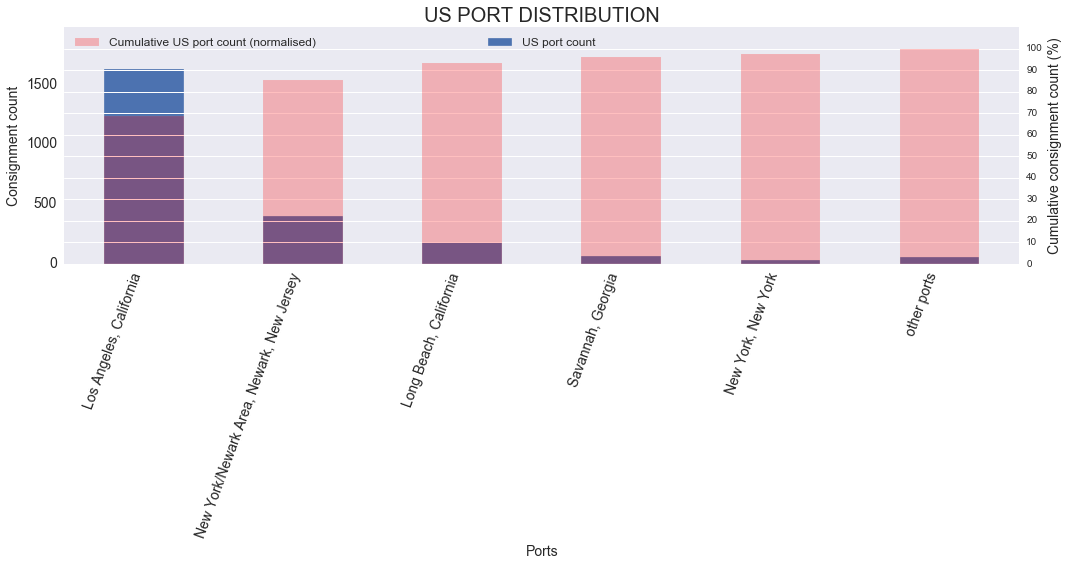

In [28]:
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()

bar1 = us_port_counts.plot(ax=ax1, kind='bar', label = 'US port count')
ax1.grid(False)

plt.title('US PORT DISTRIBUTION', fontsize=20)
plt.xticks(rotation=70)


for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
major_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  
ax2.set_yticks(major_ticks)
    
bar2 = us_port_counts_cumsum_norm.plot(ax=ax2, kind='bar', color='red', alpha=0.25, 
                                            label = 'Cumulative US port count (normalised)')

ax1.legend(loc='upper center', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)

for tick in ax1.get_xticklabels():
    tick.set_rotation(70)
    
for tick in ax1.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right") 
    
ax1.set_ylabel('Consignment count', fontsize=14)
ax1.set_xlabel('Ports', fontsize=14)
ax2.set_ylabel('Cumulative consignment count (%)', fontsize=14)        
    
ax1.set_ylim([0,1.1*1800])    
ax2.set_ylim([0,1.1*100])

plt.tight_layout()

fig.savefig('fig4.png', facecolor=fig.get_facecolor(), edgecolor='none')

In [29]:
key_us_port = us_port_counts.index.tolist()[0:1]

In [30]:
len(key_us_port)

1

## 3.4 Ship registration

In [31]:
ship_registration_counts = df_1['SHIP REGISTERED IN'].value_counts(normalize=False, sort=True, ascending=False, 
                                                        bins=None, dropna=True)

In [32]:
# all values under trash sum to one category
tresh = 30
a = ship_registration_counts[ship_registration_counts <= tresh].sum()
ship_registration_counts = ship_registration_counts[ship_registration_counts > tresh]

#then add to filtered df
ship_registration_counts.loc['other countries'] = a

In [33]:
ship_registration_counts_cumsum = np.cumsum(ship_registration_counts)

In [34]:
ship_registration_counts_cumsum_norm = ship_registration_counts_cumsum*100/max(ship_registration_counts_cumsum)

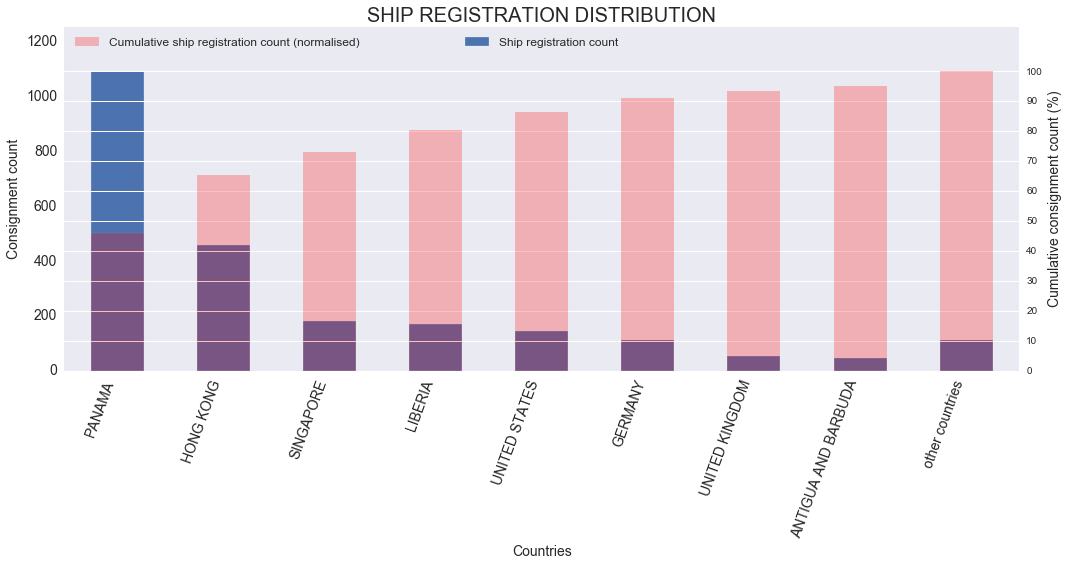

In [35]:
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()

bar1 = ship_registration_counts.plot(ax=ax1, kind='bar', label = 'Ship registration count')
ax1.grid(False)

plt.title('SHIP REGISTRATION DISTRIBUTION', fontsize=20)
plt.xticks(rotation=70)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
major_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  
ax2.set_yticks(major_ticks)
    
bar2 = ship_registration_counts_cumsum_norm.plot(ax=ax2, kind='bar', color='red', alpha=0.25, 
                                            label = 'Cumulative ship registration count (normalised)')

ax1.legend(loc='upper center', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)

for tick in ax1.get_xticklabels():
    tick.set_rotation(70)
    
for tick in ax1.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")  
    
ax1.set_ylabel('Consignment count', fontsize=14)
ax1.set_xlabel('Countries', fontsize=14)
ax2.set_ylabel('Cumulative consignment count (%)', fontsize=14)  

ax1.set_ylim([0,1.15*1091])    
ax2.set_ylim([0,1.15*100])

plt.tight_layout()

fig.savefig('fig5.png', facecolor=fig.get_facecolor(), edgecolor='none')

In [36]:
key_ship_registration = ship_registration_counts.index.tolist()[0:4]

In [37]:
len(key_ship_registration)

4

## 3.5 Container count

In [38]:
container_counts = df_1['CONTAINER COUNT'].value_counts(normalize=False, sort=True, ascending=False, 
                                                        bins=None, dropna=True)

In [39]:
# all values under trash sum to one category
tresh = 20
a = container_counts[container_counts <= tresh].sum()
container_counts = container_counts[container_counts > tresh]

# then add to filtered df
container_counts.loc['other count'] = a

In [40]:
container_counts_cumsum = np.cumsum(container_counts)

In [41]:
container_counts_cumsum_norm = container_counts_cumsum*100/max(container_counts_cumsum)

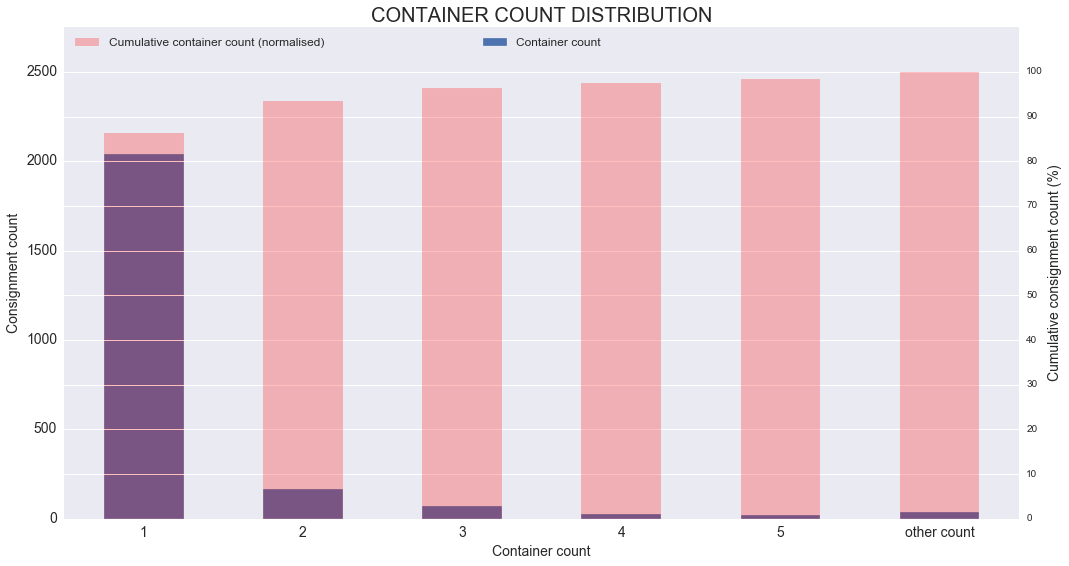

In [42]:
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()

bar1 = container_counts.plot(ax=ax1, kind='bar', label = 'Container count')
ax1.grid(False)

plt.title('CONTAINER COUNT DISTRIBUTION', fontsize=20)
plt.xticks(rotation=70)


for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
major_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  
ax2.set_yticks(major_ticks)
    
bar2 = container_counts_cumsum_norm.plot(ax=ax2, kind='bar', color='red', alpha=0.25, 
                                            label = 'Cumulative container count (normalised)')

ax1.legend(loc='upper center', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)

for tick in ax1.get_xticklabels():
    tick.set_rotation(0)
    
# for tick in ax1.xaxis.get_majorticklabels():
#     tick.set_horizontalalignment("right")    

ax1.set_ylim([0,1.1*2500])    
ax2.set_ylim([0,1.1*100])

ax1.set_ylabel('Consignment count', fontsize=14)
ax1.set_xlabel('Container count', fontsize=14)
ax2.set_ylabel('Cumulative consignment count (%)', fontsize=14)            

plt.tight_layout()

fig.savefig('fig5.png', facecolor=fig.get_facecolor(), edgecolor='none')

In [43]:
key_container_count = container_counts.index.tolist()[0:1]

In [44]:
len(key_container_count)

1

## 3.6 Country of origin

In [45]:
country_origin_counts = df_1['COUNTRY OF ORIGIN'].value_counts(normalize=False, sort=True, ascending=False, 
                                                        bins=None, dropna=True)

In [46]:
# all values under trash sum to one category
tresh = 20
a = country_origin_counts[country_origin_counts <= tresh].sum()
country_origin_counts = country_origin_counts[country_origin_counts > tresh]

# then add to filtered df
country_origin_counts.loc['other countries'] = a

In [47]:
country_origin_counts_cumsum = np.cumsum(country_origin_counts)

In [48]:
country_origin_counts_cumsum_norm = country_origin_counts_cumsum*100/max(country_origin_counts_cumsum)

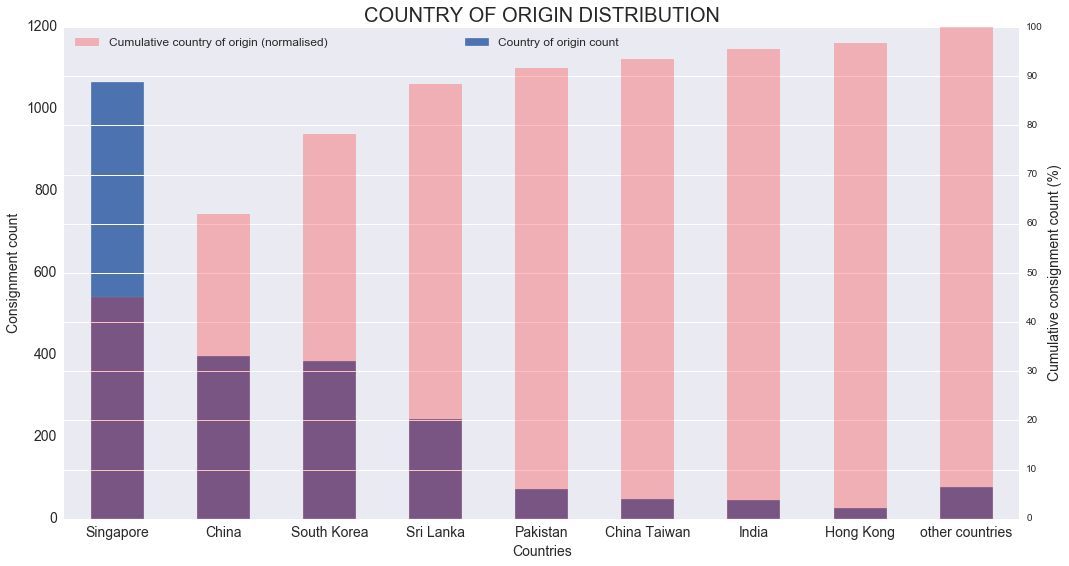

In [49]:
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()

bar1 = country_origin_counts.plot(ax=ax1, kind='bar', label = 'Country of origin count')
ax1.grid(False)

plt.title('COUNTRY OF ORIGIN DISTRIBUTION', fontsize=20)
plt.xticks(rotation=70)


for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
major_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  
ax2.set_yticks(major_ticks)
    
bar2 = country_origin_counts_cumsum_norm.plot(ax=ax2, kind='bar', color='red', alpha=0.25, 
                                            label = 'Cumulative country of origin (normalised)')

ax1.legend(loc='upper center', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)

for tick in ax1.get_xticklabels():
    tick.set_rotation(0)
    
ax1.set_ylabel('Consignment count', fontsize=14)
ax1.set_xlabel('Countries', fontsize=14)
ax2.set_ylabel('Cumulative consignment count (%)', fontsize=14)             

plt.tight_layout()

fig.savefig('fig6.png', facecolor=fig.get_facecolor(), edgecolor='none')

In [50]:
key_country_origin = country_origin_counts.index.tolist()[0:3]

In [51]:
len(key_country_origin)

3

## 3.7 Carrier name

In [52]:
carrier_name_counts = df_1['CARRIER NAME'].value_counts(normalize=False, sort=True, ascending=False, 
                                                        bins=None, dropna=True)

In [53]:
# all values under trash sum to one category
tresh = 20
a = carrier_name_counts[carrier_name_counts <= tresh].sum()
carrier_name_counts = carrier_name_counts[carrier_name_counts > tresh]

# then add to filtered df
carrier_name_counts.loc['other carriers'] = a

In [54]:
carrier_name_counts_cumsum = np.cumsum(carrier_name_counts)

In [55]:
carrier_name_counts_cumsum_norm = carrier_name_counts_cumsum*100/max(carrier_name_counts_cumsum)

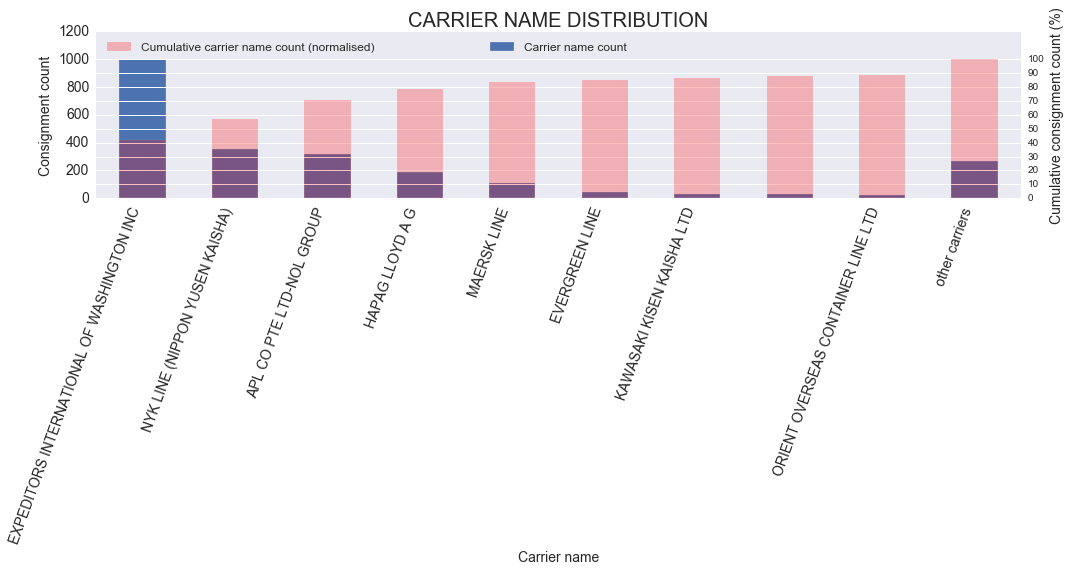

In [56]:
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()

bar1 = carrier_name_counts.plot(ax=ax1, kind='bar', label = 'Carrier name count')
ax1.grid(False)

plt.title('CARRIER NAME DISTRIBUTION', fontsize=20)
plt.xticks(rotation=70)


for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
major_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  
ax2.set_yticks(major_ticks)
    
bar2 = carrier_name_counts_cumsum_norm.plot(ax=ax2, kind='bar', color='red', alpha=0.25, 
                                            label = 'Cumulative carrier name count (normalised)')

ax1.legend(loc='upper center', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)

for tick in ax1.get_xticklabels():
    tick.set_rotation(70)
    
for tick in ax1.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right") 
    
ax1.set_ylim([0,1.2*1000])    
ax2.set_ylim([0,1.2*100])  

ax1.set_ylabel('Consignment count', fontsize=14)
ax1.set_xlabel('Carrier name', fontsize=14)
ax2.set_ylabel('Cumulative consignment count (%)', fontsize=14)  

plt.tight_layout()

fig.savefig('fig7.png', facecolor=fig.get_facecolor(), edgecolor='none')

In [57]:
key_carrier_name = carrier_name_counts.index.tolist()[0:4]

In [58]:
key_carrier_name

[u'EXPEDITORS INTERNATIONAL OF WASHINGTON INC',
 u'NYK LINE (NIPPON YUSEN KAISHA)',
 u'APL CO PTE LTD-NOL GROUP',
 u'HAPAG LLOYD A G']

## 3.8 Place of receipt

In [59]:
df_1.loc[df_1['PLACE OF RECEIPT'].isin(['CHENNAI (FORMERLY', 'CHENNAI, IN']), 'PLACE OF RECEIPT'] = 'CHENNAI'

In [60]:
df_1.loc[df_1['PLACE OF RECEIPT'].isin(['CHITTAGONG, BD', 'CHITTAGONG, BA']), 'PLACE OF RECEIPT'] = 'CHITTAGONG'

In [61]:
place_receipt_counts = df_1['PLACE OF RECEIPT'].value_counts(normalize=False, sort=True, ascending=False, 
                                                        bins=None, dropna=True)

In [62]:
place_receipt_counts

CHENNAI              1424
CHITTAGONG            260
YANTIAN                88
XIAMEN                 83
SHANGHAI               56
MUHAMMAD BIN QASI      39
NHAVA SHEVA, IN        33
NINGBO                 32
PORT QASIM             31
BAHRAIN                18
MUNDRA, IN             17
KAOHSIUNG              17
CHENNAI, INDIA         16
SALALAH                15
XIAMEN, CHINA          14
GUATEMALA CITY         14
HONG KONG              13
YANTIAN, CHINA         13
KARACHI                 9
HONG KONG, HK           8
NINGBO, CHINA           8
XIAMEN, FUJIAN          8
NINGBO,ZHEJIANG         8
YANTIAN, CN             7
XIAMEN,CHINA            7
SHANGHAI, CHINA         7
KEELUNG                 6
SHANGHAI CITY           6
PORT KLANG              4
FUZHOU CN               4
                     ... 
YANTIAN, PC             2
KEAMARI, KARACHI        2
QINGDAO                 1
GUATEMALA               1
JAWAHARLAL NEHRU        1
JIANGYIN, FUQING        1
NINGBO, PC              1
DA CHAN BAY,

In [63]:
# all values under trash sum to one category
tresh = 20
a = place_receipt_counts[place_receipt_counts <= tresh].sum()
place_receipt_counts = place_receipt_counts[place_receipt_counts > tresh]

# then add to filtered df
place_receipt_counts.loc['other locations'] = a

In [64]:
place_receipt_counts_cumsum = np.cumsum(place_receipt_counts)

In [65]:
place_receipt_counts_cumsum_norm = place_receipt_counts_cumsum*100/max(place_receipt_counts_cumsum)

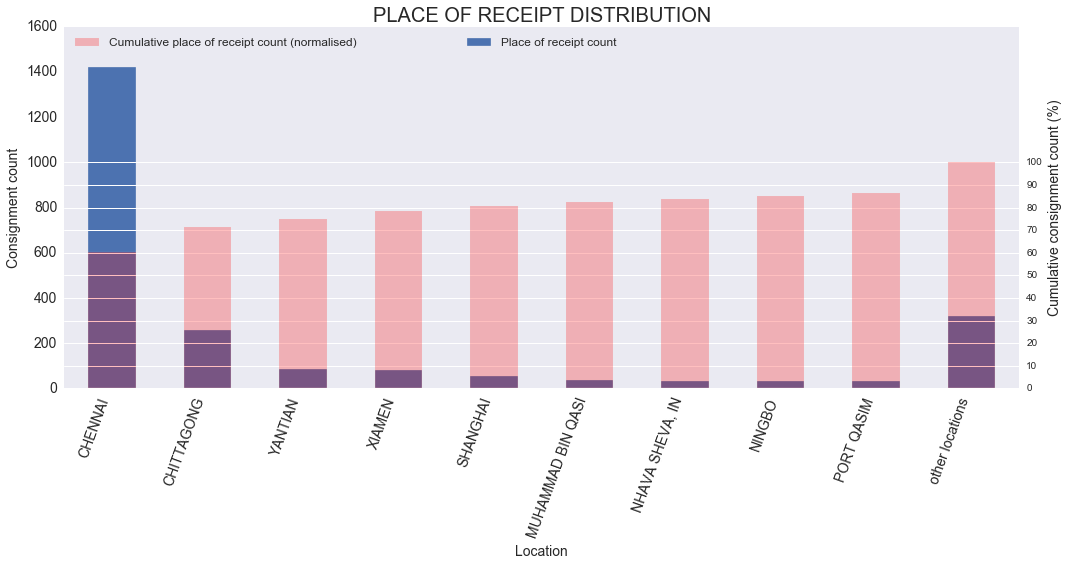

In [66]:
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()

bar1 = place_receipt_counts.plot(ax=ax1, kind='bar', label = 'Place of receipt count')
ax1.grid(False)

plt.title('PLACE OF RECEIPT DISTRIBUTION', fontsize=20)
plt.xticks(rotation=70)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
major_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  
ax2.set_yticks(major_ticks)
    
bar2 = place_receipt_counts_cumsum_norm.plot(ax=ax2, kind='bar', color='red', alpha=0.25, 
                                            label = 'Cumulative place of receipt count (normalised)')

ax1.legend(loc='upper center', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)

for tick in ax1.get_xticklabels():
    tick.set_rotation(70)
    
for tick in ax1.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right") 
    
ax1.set_ylim([0,1.6*1000])    
ax2.set_ylim([0,1.6*100])

ax1.set_ylabel('Consignment count', fontsize=14)
ax1.set_xlabel('Location', fontsize=14)
ax2.set_ylabel('Cumulative consignment count (%)', fontsize=14)  

plt.tight_layout()

fig.savefig('fig8.png', facecolor=fig.get_facecolor(), edgecolor='none')

In [67]:
key_place_receipt = place_receipt_counts.index.tolist()[0:4]

In [68]:
key_place_receipt

[u'CHENNAI', u'CHITTAGONG', u'YANTIAN', u'XIAMEN']

# 4 Filtering by Relevant Columns

In [69]:
key_foreign_ports

[u'Singapore', u'Pusan', u'Colombo', u'Yantian']

In [70]:
key_us_port

[u'Los Angeles, California']

In [71]:
key_ship_registration

[u'PANAMA', u'HONG KONG', u'SINGAPORE', u'LIBERIA']

In [72]:
key_container_count

[1]

In [73]:
key_country_origin

[u'Singapore', u'China', u'South Korea']

In [74]:
key_carrier_name

[u'EXPEDITORS INTERNATIONAL OF WASHINGTON INC',
 u'NYK LINE (NIPPON YUSEN KAISHA)',
 u'APL CO PTE LTD-NOL GROUP',
 u'HAPAG LLOYD A G']

In [75]:
key_place_receipt

[u'CHENNAI', u'CHITTAGONG', u'YANTIAN', u'XIAMEN']

In [76]:
df_2 = df_1[df_1['FOREIGN PORT'].isin(key_foreign_ports)]

In [77]:
df_2.shape

(1821, 15)

In [78]:
df_3 = df_2[df_2['US PORT'].isin(key_us_port)]

In [79]:
df_3.shape

(1503, 15)

In [80]:
df_4 = df_3[df_3['SHIP REGISTERED IN'].isin(key_ship_registration)]

In [81]:
df_4.shape

(1465, 15)

In [82]:
df_5 = df_4[df_4['CONTAINER COUNT'].isin(key_container_count)]

In [83]:
df_5.shape

(1385, 15)

In [84]:
df_6 = df_5[df_5['COUNTRY OF ORIGIN'].isin(key_country_origin)]

In [85]:
df_6.shape

(1385, 15)

In [86]:
df_7 = df_6[df_6['CARRIER NAME'].isin(key_carrier_name)]

In [87]:
df_7.shape

(1365, 15)

In [88]:
df_8 = df_7[df_7['PLACE OF RECEIPT'].isin(key_place_receipt)]

In [89]:
df_8.shape

(1362, 15)

In [90]:
df_8.head()

,ARRIVAL DATE,WEIGHT (KG),FOREIGN PORT,US PORT,QUANTITY,Q.UNIT,MEASUREMENT,SHIP REGISTERED IN,VESSEL NAME,CONTAINER NUMBER,CONTAINER COUNT,PRODUCT DETAILS,COUNTRY OF ORIGIN,CARRIER NAME,PLACE OF RECEIPT
18,2013-10-04,9559.0,Singapore,"Los Angeles, California",1507,CTN,0,PANAMA,NYK APOLLO,NYKU8274687,1,ONE THOUSAND FIVE HUNDRED & SEVEN CARTONS ONLY...,Singapore,NYK LINE (NIPPON YUSEN KAISHA),CHENNAI
19,2013-10-04,132.0,Singapore,"Los Angeles, California",22,CTN,0,PANAMA,NYK APOLLO,NYKU8274687,1,TWENTY TWO CARTONS ONLY. LADIES 98% COTTON 2% ...,Singapore,NYK LINE (NIPPON YUSEN KAISHA),CHENNAI
20,2013-10-04,126.0,Singapore,"Los Angeles, California",21,CTN,0,PANAMA,NYK APOLLO,NYKU8274687,1,TWENTY ONE CARTONS ONLY. LADIES 98% COTTON 2% ...,Singapore,NYK LINE (NIPPON YUSEN KAISHA),CHENNAI
21,2013-10-04,165.0,Singapore,"Los Angeles, California",28,CTN,0,PANAMA,NYK APOLLO,NYKU2810972,1,TWENTY EIGHT CARTONS ONLY. MENS 54.3% POLYESTE...,Singapore,NYK LINE (NIPPON YUSEN KAISHA),CHENNAI
22,2013-10-04,165.0,Singapore,"Los Angeles, California",28,CTN,0,PANAMA,NYK APOLLO,NYKU2810972,1,TWENTY EIGHT CARTONS ONLY. MENS 65% POLYESTER ...,Singapore,NYK LINE (NIPPON YUSEN KAISHA),CHENNAI


# 5 Further analysis

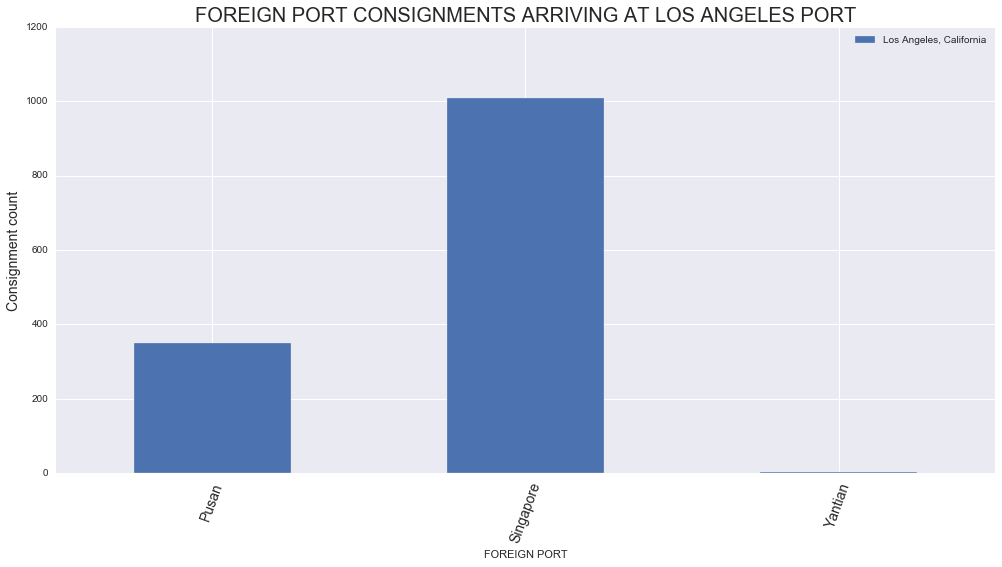

In [91]:
fig, ax = plt.subplots(figsize=(15,8))
groupby_us_port = df_8['US PORT'].groupby(df_8['FOREIGN PORT']).value_counts(normalize=False, sort=True, ascending=False, 
                                                        bins=None, dropna=True).unstack().plot(ax=ax, kind='bar')

plt.title('FOREIGN PORT CONSIGNMENTS ARRIVING AT LOS ANGELES PORT', fontsize=20)
plt.xticks(rotation=70)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
#ax.legend(loc='upper left', fontsize=12)

ax.set_ylabel('Consignment count', fontsize=14)

fig.savefig('fig9.png', facecolor=fig.get_facecolor(), edgecolor='none')


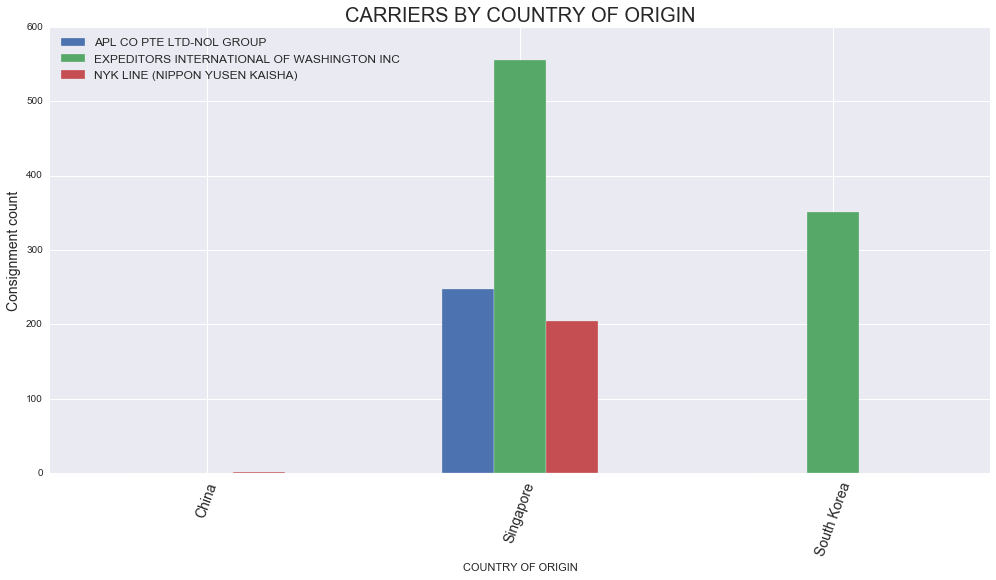

In [92]:
fig, ax = plt.subplots(figsize=(15,8))
groupby_us_port = df_8['CARRIER NAME'].groupby(df_8['COUNTRY OF ORIGIN']).value_counts(normalize=False, sort=True, ascending=False, 
                                                        bins=None, dropna=True).unstack().plot(ax=ax, kind='bar')

plt.title('CARRIERS BY COUNTRY OF ORIGIN', fontsize=20)
plt.xticks(rotation=70)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
ax.legend(loc='upper left', fontsize=12)

ax.set_ylabel('Consignment count', fontsize=14)

fig.savefig('fig10.png', facecolor=fig.get_facecolor(), edgecolor='none')


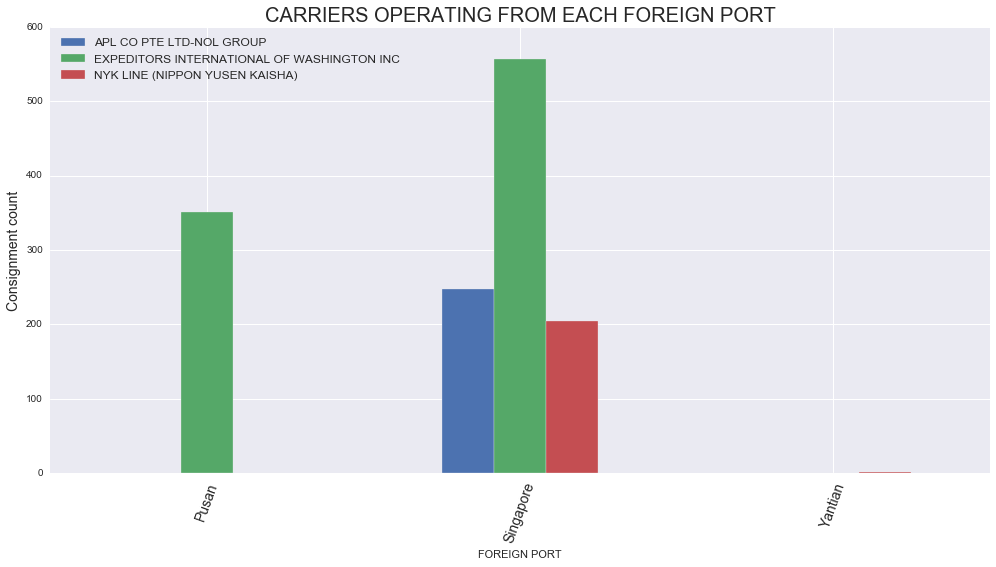

In [93]:
fig, ax = plt.subplots(figsize=(15,8))
groupby_us_port = df_8['CARRIER NAME'].groupby(df_8['FOREIGN PORT']).value_counts(normalize=False, sort=True, ascending=False, 
                                                        bins=None, dropna=True).unstack().plot(ax=ax, kind='bar')

plt.title('CARRIERS OPERATING FROM EACH FOREIGN PORT', fontsize=20)
plt.xticks(rotation=70)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
ax.legend(loc='upper left', fontsize=12)

ax.set_ylabel('Consignment count', fontsize=14)

fig.savefig('fig10.png', facecolor=fig.get_facecolor(), edgecolor='none')


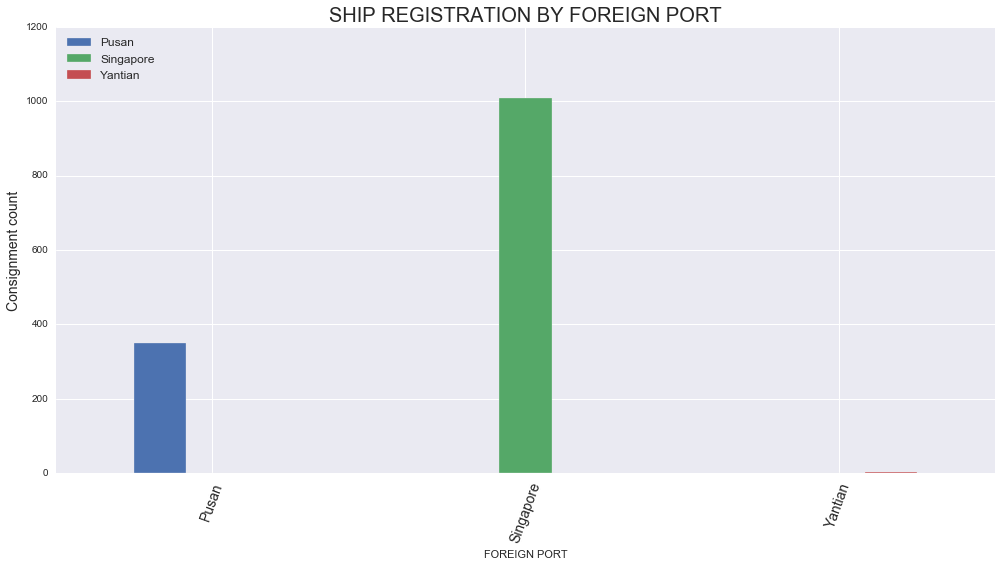

In [94]:
fig, ax = plt.subplots(figsize=(15,8))
groupby_us_port = df_8['FOREIGN PORT'].groupby(df_8['FOREIGN PORT']).value_counts(normalize=False, sort=True, ascending=False, 
                                                        bins=None, dropna=True).unstack().plot(ax=ax, kind='bar')

plt.title('SHIP REGISTRATION BY FOREIGN PORT', fontsize=20)
plt.xticks(rotation=70)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
ax.legend(loc='upper left', fontsize=12)

ax.set_ylabel('Consignment count', fontsize=14)

fig.savefig('fig11.png', facecolor=fig.get_facecolor(), edgecolor='none')


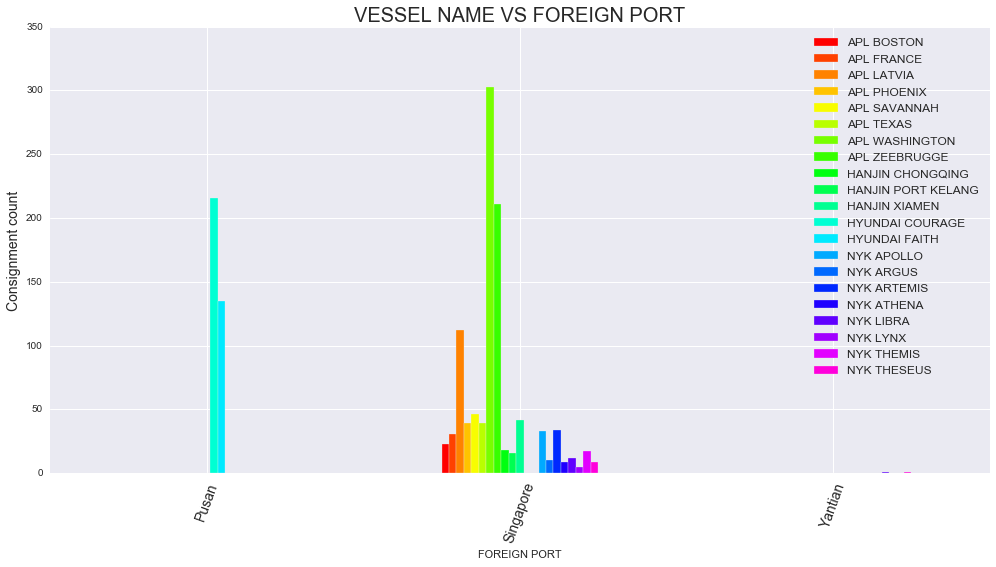

In [117]:
from matplotlib import cm

fig, ax = plt.subplots(figsize=(15,8))

y = np.arange(0,1,1./20.)
groupby_us_port = df_8['VESSEL NAME'].groupby(df_8['FOREIGN PORT']).value_counts(normalize=False, sort=True, ascending=False, 
                                                        bins=None, dropna=True).unstack().plot(ax=ax, kind='bar', 
                                                                                               color=my_colors)

plt.title('VESSEL NAME VS FOREIGN PORT', fontsize=20)
plt.xticks(rotation=70)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
ax.legend(loc='best', fontsize=12)

ax.set_ylabel('Consignment count', fontsize=14)

fig.savefig('fig12.png', facecolor=fig.get_facecolor(), edgecolor='none')


In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
groupby_us_port = df_8['COUNTRY OF ORIGIN'].groupby(df_8['FOREIGN PORT']).value_counts(normalize=False, sort=True, ascending=False, 
                                                        bins=None, dropna=True).unstack().plot(ax=ax, kind='bar')

plt.title('COUNTRY OF ORIGIN VS FOREIGN PORT', fontsize=20)
plt.xticks(rotation=70)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    
ax.legend(loc='best', fontsize=12)

ax.set_ylabel('Consignment count', fontsize=14)

fig.savefig('fig13.png', facecolor=fig.get_facecolor(), edgecolor='none')


In [97]:
range(0,21)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [99]:
np.arange(0,21,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])